In [19]:
# read in json
import json
from scipy import stats
import matplotlib.pyplot as plt

with open('photograph-ratings-c-export.json') as f:
    jsondata = json.load(f)

data = jsondata['data']
data

{'11MmoKBzavPSO0NiENA3NxyxcFq1': {'data': {'trial00': {'image': 34,
    'rating': '7'},
   'trial01': {'image': 49, 'rating': '4'},
   'trial02': {'image': 39, 'rating': '6'},
   'trial03': {'image': 6, 'rating': '7'},
   'trial04': {'image': 17, 'rating': '5'},
   'trial05': {'image': 46, 'rating': '6'},
   'trial06': {'image': 41, 'rating': '7'},
   'trial07': {'image': 36, 'rating': '4'},
   'trial08': {'image': 52, 'rating': '7'},
   'trial09': {'image': 6, 'rating': '7'},
   'trial10': {'image': 30, 'rating': '6'},
   'trial11': {'image': 7, 'rating': '7'},
   'trial12': {'image': 15, 'rating': '3'},
   'trial13': {'image': 17, 'rating': '5'},
   'trial14': {'image': 21, 'rating': '6'},
   'trial15': {'image': 32, 'rating': '6'},
   'trial16': {'image': 10, 'rating': '6'},
   'trial17': {'image': 31, 'rating': '7'},
   'trial18': {'image': 18, 'rating': '7'},
   'trial19': {'image': 34, 'rating': '8'},
   'trial20': {'image': 42, 'rating': '7'},
   'trial21': {'image': 33, 'rating

In [20]:
# find subjects who didn't complete the experiment, remove them
# rename kept subjects in sensible way (sub1, sub2...)
subjects = {}
count = 1
for sub in data:
    if data[sub]['status'] == 'completed':
        subjects[count] = data[sub]
        count += 1
subjects.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])

In [22]:
# For each subject, figure out which images were repeated
def repeats(order):
    return set([x for x in order if order.count(x) > 1])
for sub in subjects:
    print("sub" + str(sub))
    print(repeats(subjects[sub]['trialOrder']))
    print()

sub1
{34, 36, 5, 6, 39, 7, 41, 10, 11, 44, 13, 15, 49, 17, 18, 20, 24, 27, 28, 31}

sub2
{1, 34, 2, 37, 38, 39, 6, 41, 9, 7, 44, 13, 45, 47, 50, 21, 22, 24, 25, 27}

sub3
{34, 3, 4, 38, 7, 8, 41, 40, 43, 44, 39, 46, 48, 16, 20, 52, 24, 27, 30, 31}

sub4
{32, 33, 2, 6, 8, 41, 10, 43, 13, 14, 47, 45, 49, 50, 20, 53, 23, 24, 26, 31}

sub5
{3, 5, 38, 39, 7, 41, 42, 10, 43, 45, 8, 48, 17, 52, 53, 22, 21, 25, 26, 27}

sub6
{33, 1, 4, 36, 38, 37, 8, 40, 42, 10, 39, 45, 47, 48, 50, 18, 52, 25, 27, 29}

sub7
{1, 2, 34, 37, 6, 7, 39, 40, 9, 42, 11, 13, 44, 47, 16, 50, 52, 26, 28, 31}

sub8
{32, 33, 34, 3, 36, 5, 4, 39, 10, 45, 13, 47, 16, 49, 48, 19, 25, 26, 27, 30}

sub9
{34, 35, 3, 2, 39, 8, 41, 13, 46, 47, 15, 49, 18, 19, 52, 16, 51, 48, 27, 29}

sub10
{1, 3, 35, 5, 7, 8, 9, 10, 39, 11, 14, 47, 16, 50, 51, 20, 53, 19, 26, 27}

sub11
{1, 4, 36, 7, 40, 43, 46, 47, 48, 17, 50, 51, 20, 49, 22, 23, 18, 27, 29, 30}

sub12
{33, 35, 3, 38, 39, 8, 6, 42, 11, 15, 48, 17, 50, 51, 18, 20, 23, 25, 30, 31}

In [23]:
# Get photo ratings for all the repeated photos (for each subject)    
def ratings(sub):
    rpts = repeats(sub['trialOrder'])
    ratings1 = {}
    ratings2 = {}
    for trial in sub['data']:
        image = sub['data'][trial]['image']
        rt = sub['data'][trial]['rating']
        if image in rpts:
            if image not in ratings1.keys():
                ratings1[image] = rt
            else:
                ratings2[image] = rt
    return ratings1, ratings2
def sort(r1, r2):
    r1sorted = sorted(r1)
    r2sorted = sorted(r2)
    r01 = []
    r02 = []
    for x in r1sorted:
        r01.append(r1[x])
        r02.append(r2[x])
    return r01, r02
for sub in subjects:
    r1, r2 = ratings(subjects[sub])
    r01, r02 = sort(r1, r2)
    print("sub" + str(sub))
    print(r01)
    print(r02)
    print()

sub1
['4', '7', '7', '6', '4', '5', '3', '5', '7', '6', '6', '8', '4', '7', '7', '4', '6', '7', '7', '4']
['5', '7', '7', '5', '4', '5', '3', '5', '7', '6', '6', '8', '4', '7', '8', '4', '6', '7', '6', '3']

sub2
['4', '5', '5', '4', '4', '5', '4', '5', '3', '6', '6', '4', '6', '7', '7', '6', '5', '6', '5', '4']
['3', '4', '4', '4', '3', '5', '5', '5', '5', '7', '6', '7', '6', '6', '6', '5', '5', '7', '4', '6']

sub3
['6', '6', '5', '7', '6', '6', '6', '6', '6', '8', '7', '6', '6', '6', '6', '7', '7', '5', '6', '6']
['4', '4', '4', '4', '6', '4', '6', '7', '7', '6', '8', '6', '5', '4', '5', '6', '6', '4', '7', '6']

sub4
['7', '7', '6', '5', '7', '7', '6', '7', '6', '5', '6', '6', '6', '7', '7', '7', '6', '6', '6', '5']
['6', '7', '6', '5', '7', '7', '4', '6', '5', '5', '5', '4', '5', '7', '6', '7', '5', '5', '7', '5']

sub5
['2', '3', '4', '5', '4', '5', '6', '6', '6', '4', '5', '6', '8', '5', '7', '5', '6', '7', '6', '6']
['5', '4', '6', '3', '4', '3', '6', '5', '3', '4', '3', '6', '

In [24]:
# Calculate the correlation between the two repetitions for each subject
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
# [r,p] = stats.pearsonr(arrayRatings1, arrayRatings2)
def corr(r1, r2):
    return stats.pearsonr(r1, r2)
for sub in subjects:
    r1, r2 = ratings(subjects[sub])
    r01, r02 = sort(r1, r2)
    r01 = list(map(int, r01))
    r02 = list(map(int, r02))
    print(corr(r01, r02))

(0.9428356922977015, 5.025879604572056e-10)
(0.46293919180146437, 0.03983088019389037)
(0.36742393933654316, 0.11100415949121757)
(0.6769328855251888, 0.0010449511138229926)
(0.3912716951827952, 0.08801983328674677)
(0.8976936362315467, 8.002175913855242e-08)
(0.19106696524274136, 0.4197049853706958)
(0.7865665062071159, 3.904024747551521e-05)
(0.7031465352048644, 0.0005436109703464553)
(0.8946658726590323, 1.0286291478322675e-07)
(0.5005316109308241, 0.024592384773522383)
(0.8220479803106573, 8.734388571928116e-06)
(0.6332983258211112, 0.002721845510494839)
(0.4092904969470586, 0.07313430895677674)
(0.5911180298100912, 0.006055075936709592)
(0.4773163984865598, 0.0333196937278819)
(0.9269821892408703, 4.290119250883347e-09)
(-0.1544012685441067, 0.5157193996412024)
(0.2850236203160932, 0.2232036212623392)
(0.9059474275629015, 3.871455000768821e-08)
(-0.015672903110733778, 0.947710732270585)
(-0.2100420126042014, 0.3740958888380401)
(0.6325254807305303, 0.002764849312879293)
(-0.678456

<BarContainer object of 38 artists>

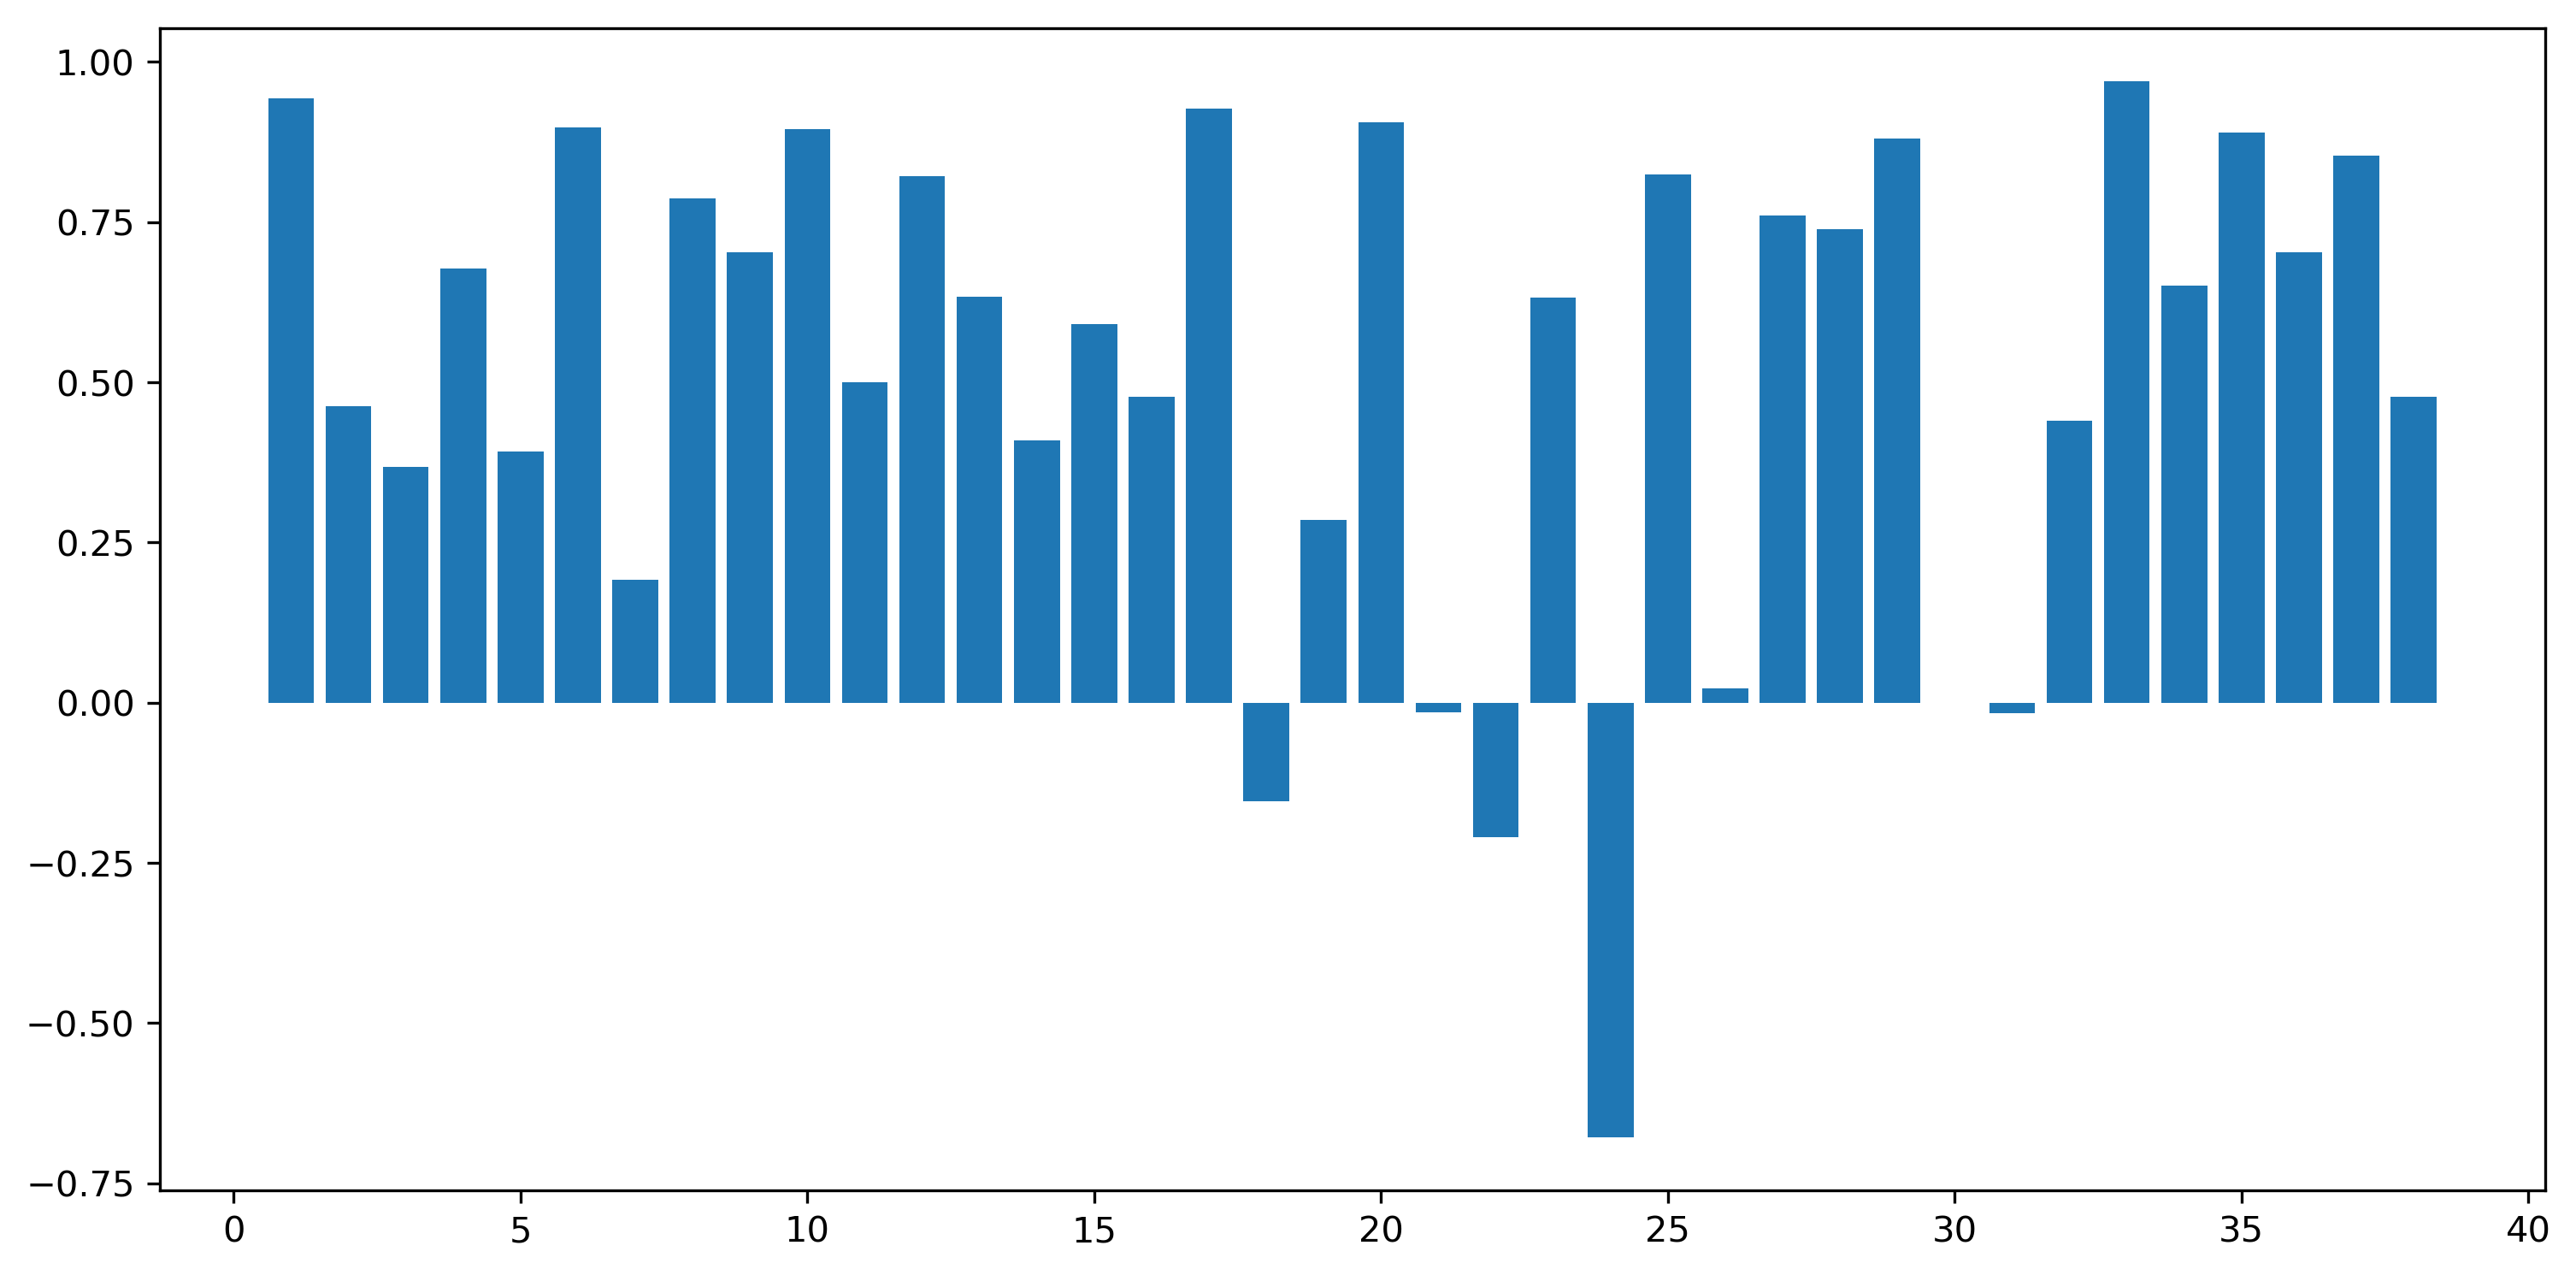

In [25]:
# plot the results
# order r values by magnitude (smallest -> largest)
# bar plot -https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html
# plt.bar(x, rValues) # x=1-30 (number for each subject)
fig = plt.figure(figsize=(12,6), dpi=300)
x = subjects.keys()
rValues = []
for sub in subjects:
    r1, r2 = ratings(subjects[sub])
    r01, r02 = sort(r1, r2)
    r01 = list(map(int, r01))
    r02 = list(map(int, r02))
    rValues.append(corr(r01, r02)[0])
plt.bar(x, rValues)

[7, 7, 7, 7, 7, 7, 6, 7, 7, 8, 7, 6, 7, 6, 6, 6, 6, 6, 8, 7]
[7, 7, 7, 6, 6, 7, 7, 6, 7, 7, 6, 8, 6, 8, 7, 8, 8, 8, 6, 7]
(-0.6784566544904613, 0.001007769980008647)


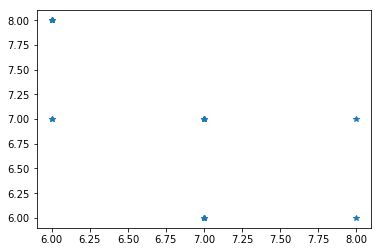

In [28]:
    r1, r2 = ratings(subjects[24])
    r01, r02 = sort(r1, r2)
    r01 = list(map(int, r01))
    r02 = list(map(int, r02))
print(r01)
print(r02)
print(corr(r01, r02))

plt.plot(r01, r02, '*')

In [44]:
# find average for every image
# find standard deviation for every image
# sort images from lowest to highest average
def rating(sub):
    ratings = {}
    for trial in sub['data']:
        image = sub['data'][trial]['image']
        rt = int(sub['data'][trial]['rating'])
        if image not in ratings:
            ratings[image] = rt
        else:
            ratings[image] = (ratings[image] + rt)/2.0
    return ratings

def sort_rating(r):
    rsorted = sorted(r)
    r_sorted = []
    for x in rsorted:
        r_sorted.append(r[x])
    return r_sorted

import statistics
numb = 0
imagenum = 1
avglst = []
stats = {}
for i in range(1, 54):
    imagelst = []
    for sub in subjects:
        lst = sort_rating(rating(subjects[sub]))
        imagelst.append(lst[numb])
    avg = sum(imagelst) / 38.0
    avglst.append(avg)
    std = statistics.stdev(imagelst)
    stats[imagenum] = "avg: " + str(avg), "std: " + str(std)
    numb += 1
    imagenum += 1
statssort = sorted(stats.values())
for x in statssort:
    print("image" + str(list(stats.keys())[list(stats.values()).index(x)]))
    print(x)
    print()

image15
('avg: 4.7368421052631575', 'std: 1.930329904954854')

image49
('avg: 5.25', 'std: 2.005903449483212')

image10
('avg: 5.276315789473684', 'std: 1.912608832519196')

image17
('avg: 5.2894736842105265', 'std: 1.9264572544810894')

image1
('avg: 5.302631578947368', 'std: 1.7302533546877608')

image3
('avg: 5.381578947368421', 'std: 1.4906655983255581')

image11
('avg: 5.407894736842105', 'std: 1.7700788772999474')

image13
('avg: 5.5394736842105265', 'std: 1.539487361795023')

image12
('avg: 5.631578947368421', 'std: 1.5008295477624034')

image32
('avg: 5.697368421052632', 'std: 1.8436870875540827')

image46
('avg: 5.802631578947368', 'std: 1.741929163872283')

image47
('avg: 5.855263157894737', 'std: 1.5977513537267631')

image14
('avg: 5.868421052631579', 'std: 1.4735699000575504')

image19
('avg: 5.881578947368421', 'std: 1.6823174593813746')

image36
('avg: 5.894736842105263', 'std: 1.7287626208206015')

image5
('avg: 5.907894736842105', 'std: 1.622707377151975')

image7
('av

(array([1., 0., 6., 3., 9., 5., 8., 6., 7., 8.]),
 array([4.73684211, 4.99078947, 5.24473684, 5.49868421, 5.75263158,
        6.00657895, 6.26052632, 6.51447368, 6.76842105, 7.02236842,
        7.27631579]),
 <a list of 10 Patch objects>)

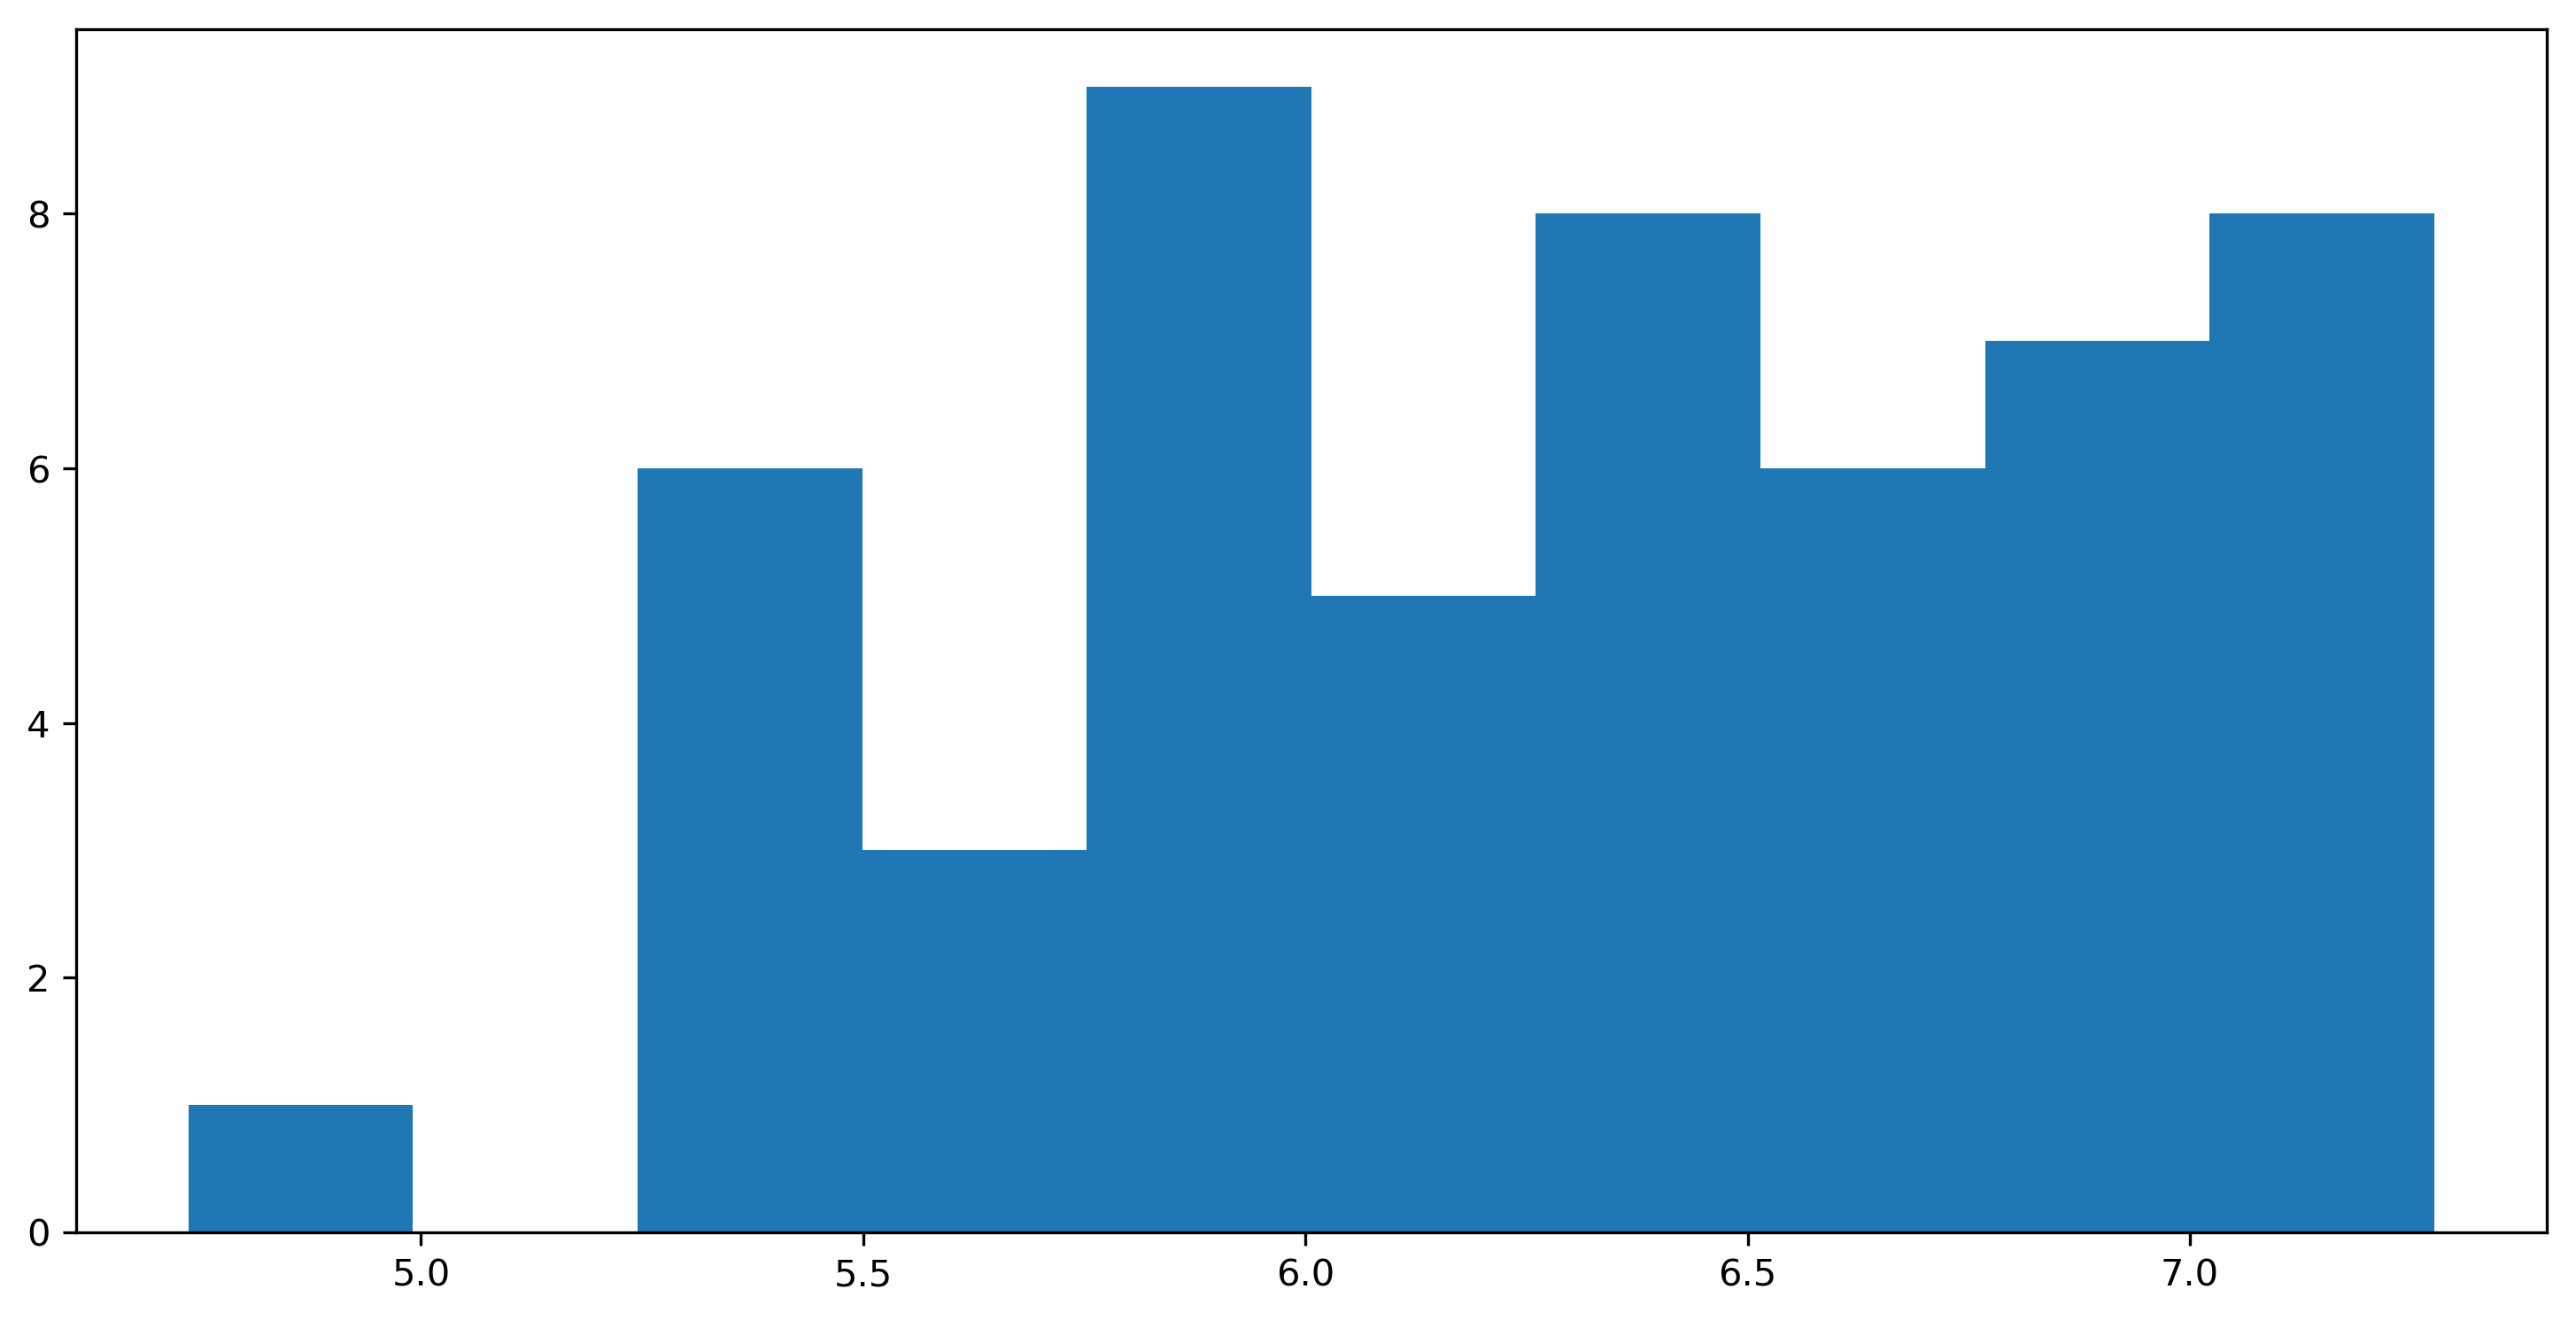

In [45]:
# make histogram (x -> competence, y -> # of pictures)
fig = plt.figure(figsize=(12,6), dpi=300)
plt.hist(avglst)

In [41]:
# find average for every image (without 9 subjects)
# find standard deviation for every image (without 9 subjects)
badsubs = [7, 18, 19, 21, 22, 24, 26, 30, 31]
numb = 0
imagenum = 1
avglist = []
stats = {}
for i in range(1, 54):
    imagelst = []
    for sub in subjects:
        if sub not in badsubs:
            lst = sort_rating(rating(subjects[sub]))
            imagelst.append(lst[numb])
    avg = sum(imagelst) / 29.0
    avglist.append(avg)
    std = statistics.stdev(imagelst)
    stats[imagenum] = "avg: " + str(avg), "std: " + str(std)
    numb += 1
    imagenum += 1
statssort = sorted(stats.values())
for x in statssort:
    print("image" + str(list(stats.keys())[list(stats.values()).index(x)]))
    print(x)
    print()

image15
('avg: 4.137931034482759', 'std: 1.7315174585777662')

image10
('avg: 4.810344827586207', 'std: 1.9058827777598433')

image17
('avg: 4.879310344827586', 'std: 1.7710729819488418')

image49
('avg: 4.931034482758621', 'std: 1.8599353768105304')

image1
('avg: 4.948275862068965', 'std: 1.633056006750003')

image11
('avg: 4.982758620689655', 'std: 1.6118022223402246')

image3
('avg: 5.155172413793103', 'std: 1.5817228868042577')

image13
('avg: 5.172413793103448', 'std: 1.4655317298617343')

image32
('avg: 5.293103448275862', 'std: 1.8875401669298058')

image12
('avg: 5.310344827586207', 'std: 1.4663718169068578')

image46
('avg: 5.413793103448276', 'std: 1.7220677226460377')

image19
('avg: 5.5344827586206895', 'std: 1.7109470773457116')

image47
('avg: 5.551724137931035', 'std: 1.56036183753622')

image5
('avg: 5.620689655172414', 'std: 1.6564547577679325')

image9
('avg: 5.655172413793103', 'std: 1.7733314505465516')

image30
('avg: 5.689655172413793', 'std: 1.4965066052992995')

(array([1., 0., 5., 4., 8., 5., 8., 9., 5., 8.]),
 array([4.13793103, 4.45344828, 4.76896552, 5.08448276, 5.4       ,
        5.71551724, 6.03103448, 6.34655172, 6.66206897, 6.97758621,
        7.29310345]),
 <a list of 10 Patch objects>)

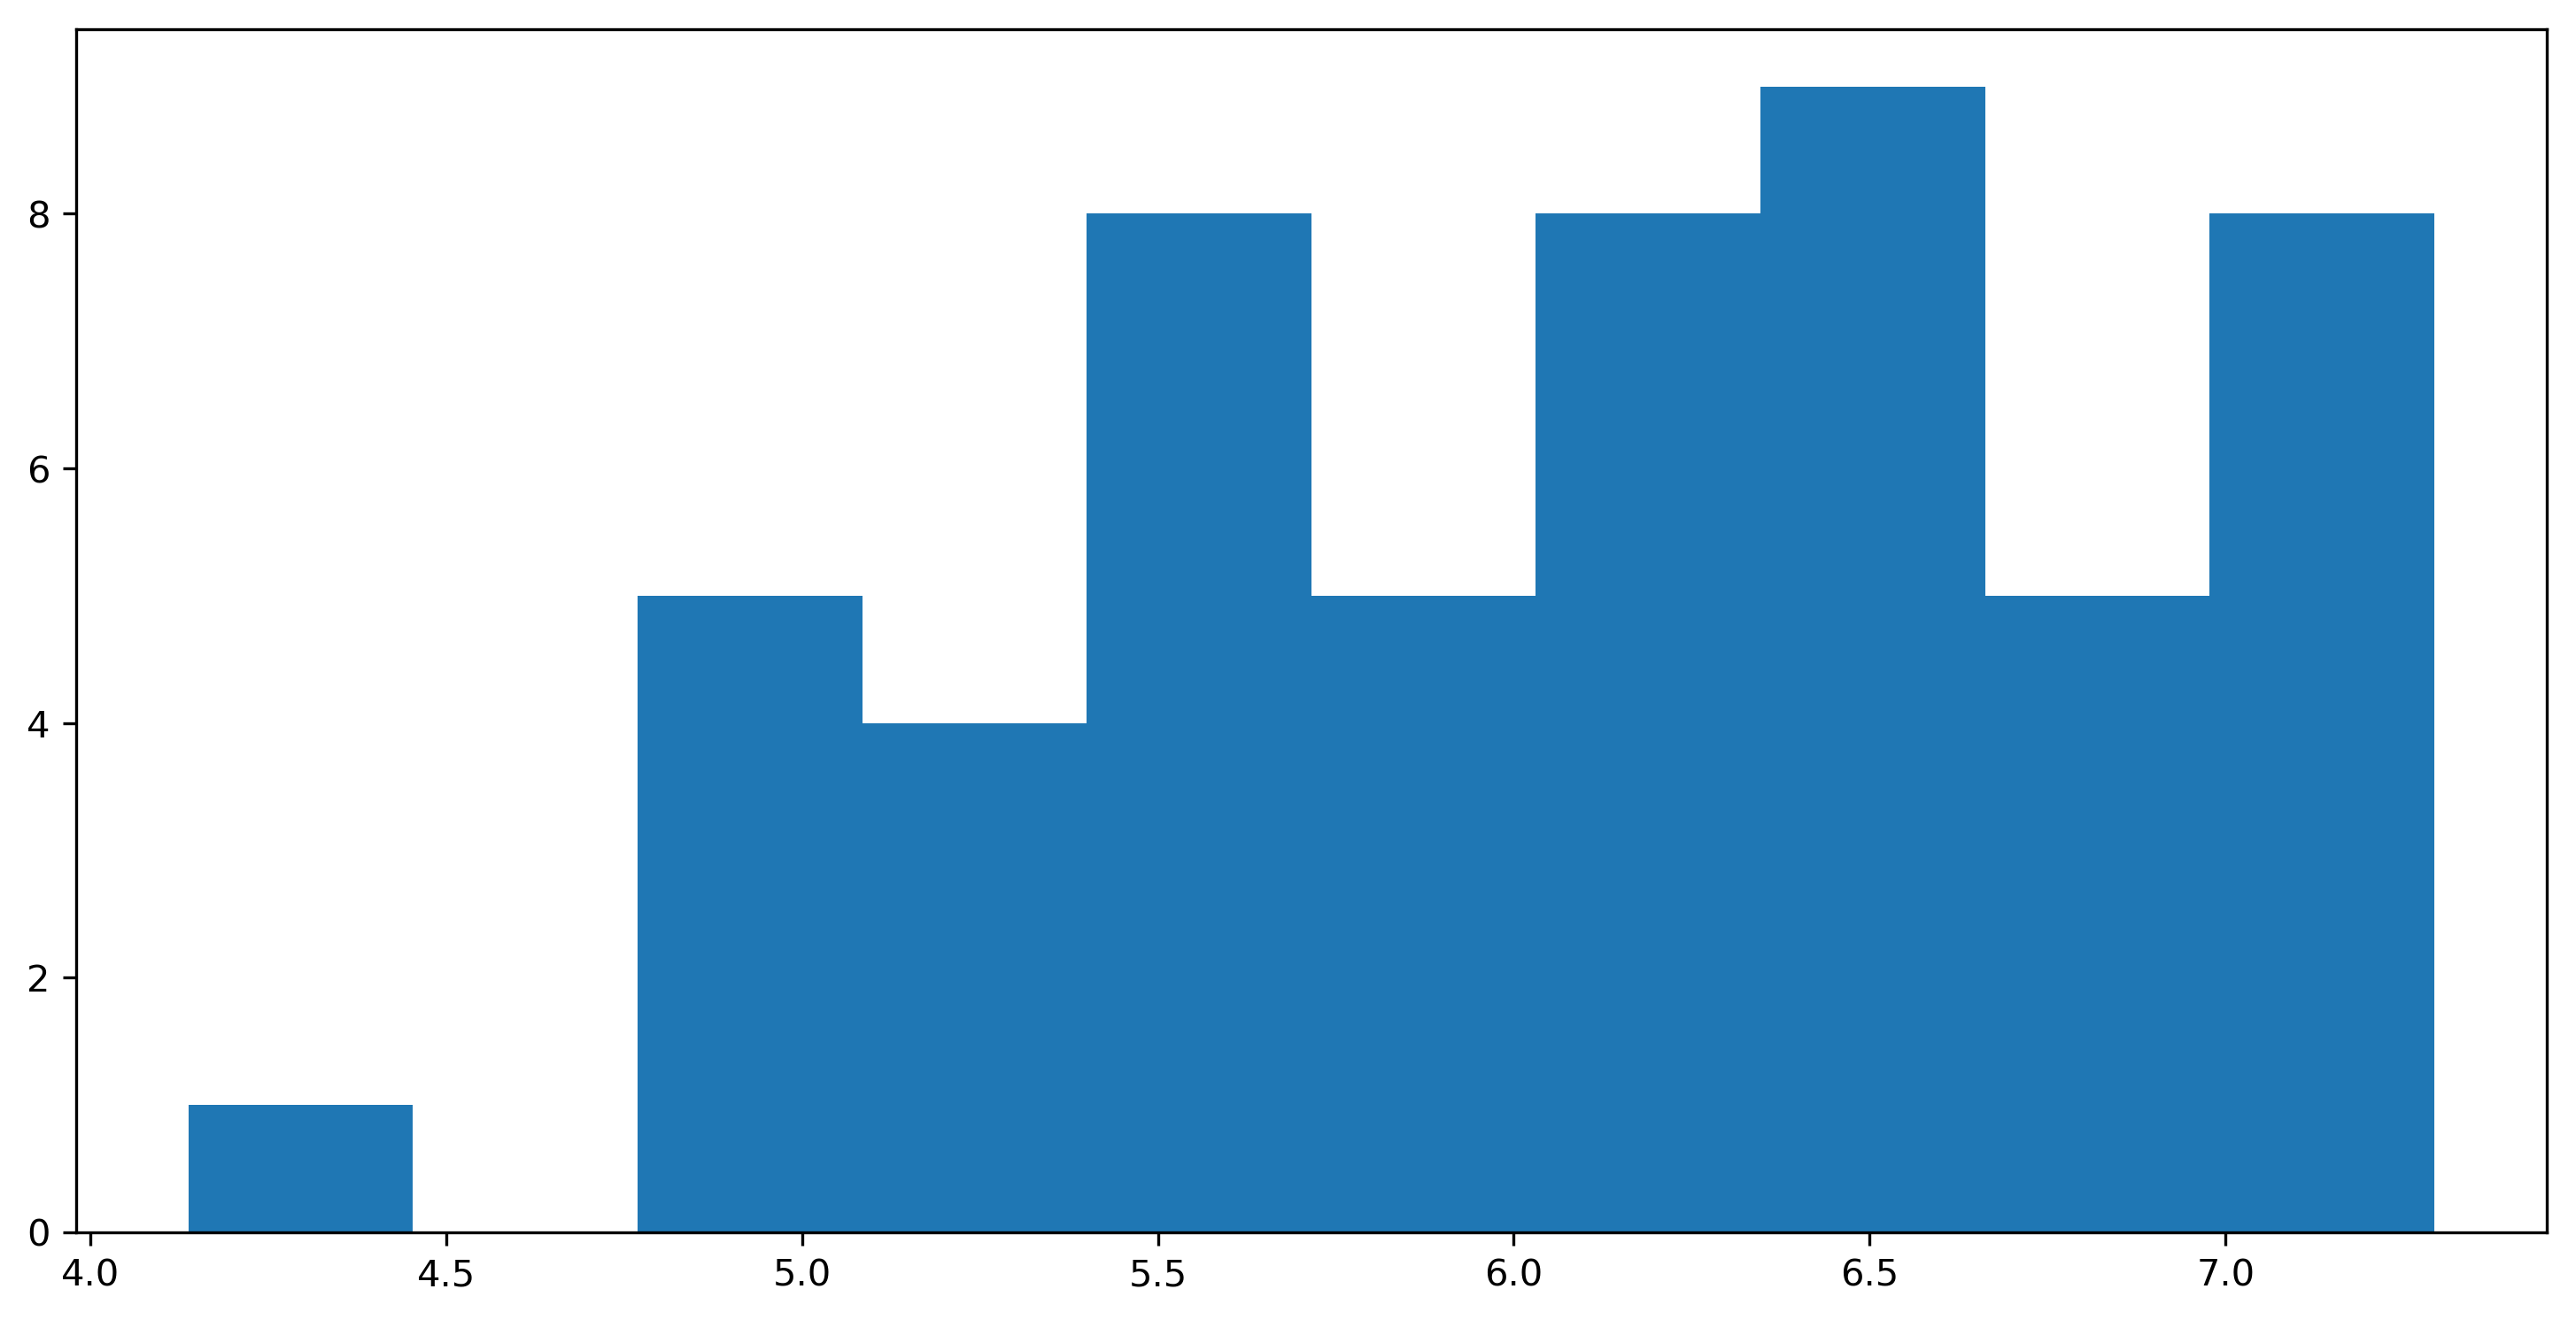

In [42]:
# histogram without 9 subjects (3 have low positive correlations)
fig = plt.figure(figsize=(12,6), dpi=300)
plt.hist(avglist)